In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts

In [2]:
data = pd.read_csv('Coin_data.csv')

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data['Date'] = pd.to_datetime(data.Date, errors='coerce')

In [4]:
data.dtypes

Currency              object
Date          datetime64[ns]
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Market_Cap            object
dtype: object

In [5]:
data['Open'] = pd.to_numeric(data.Open, errors='coerce')
data['High'] = pd.to_numeric(data.High, errors='coerce')
data['Low'] = pd.to_numeric(data.Low, errors='coerce')
data['Close'] = pd.to_numeric(data.Close, errors='coerce')
data['Volume'] =pd.to_numeric(data.Volume, errors='coerce')
data['Market_Cap'] = pd.to_numeric(data.Market_Cap, errors='coerce')

In [6]:
data.dtypes

Currency              object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market_Cap           float64
dtype: object

In [7]:
data.isnull().sum()

Currency         0
Date             3
Open             3
High             3
Low              3
Close            3
Volume         912
Market_Cap    3388
dtype: int64

In [8]:
data.Date.fillna(method='ffill',inplace=True)
data.Open.fillna(method='ffill',inplace=True)
data.High.fillna(method='ffill',inplace=True)
data.Low.fillna(method='ffill',inplace=True)
data.Close.fillna(method='ffill',inplace=True)

In [9]:
train = data.iloc[:,1:7]
test = data.iloc[:,7:8]

In [10]:
print(train.head())
print(test.head())

        Date      Open  High       Low     Close      Volume
0 2018-02-11  1.090000  1.09  0.934155  0.979054   4888770.0
1 2018-02-10  1.140000  1.20  0.985705  1.100000  10828700.0
2 2018-02-09  1.080000  1.15  1.010000  1.140000   5979420.0
3 2018-02-08  0.988963  1.13  0.988963  1.070000  12992800.0
4 2018-02-07  1.010000  1.16  0.902145  0.993355  13476600.0
    Market_Cap
0  555363000.0
1  576535000.0
2  545842000.0
3  501142000.0
4  513163000.0


In [11]:
from sklearn.preprocessing import Imputer as imp

In [12]:
imp= imp(missing_values='NaN',strategy='median',axis=0)

In [13]:
train.iloc[:,1:6] = imp.fit_transform(train.iloc[:,1:6])

In [14]:
train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
test.fillna(pd.DataFrame.mean(test), inplace=True)

In [16]:
test.isnull().sum()

Market_Cap    0
dtype: int64

In [17]:
train.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-11,1.090000,1.09,0.934155,0.979054,4888770.0
1,2018-02-10,1.140000,1.20,0.985705,1.100000,10828700.0
2,2018-02-09,1.080000,1.15,1.010000,1.140000,5979420.0
3,2018-02-08,0.988963,1.13,0.988963,1.070000,12992800.0
4,2018-02-07,1.010000,1.16,0.902145,0.993355,13476600.0


In [23]:
#Replacing Date with some usable measure
train['Date'] = (train.Date.dt.month)*10**(-2) + train.Date.dt.dayofyear

In [25]:
from sklearn.ensemble import BaggingRegressor as BR

In [28]:
X_tr, X_te, Y_tr, Y_te = tts(train, test, test_size=.3, random_state=255)

In [29]:
br.fit(X_tr,Y_tr)

C:\Users\Vishnu\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [30]:
pred = br.predict(X_te)

In [34]:
pred.shape

(24947,)

In [37]:
Y_te = np.resize(Y_te,(24947,))

In [39]:
Pred = Y_te - pred

In [41]:
br.score(X_te,Y_te)

0.9868854942311692

In [42]:
Pred = np.sum((Pred)**2)

In [43]:
Pred

2.5963064980752432e+22

In [44]:
Avg = Y_te - np.mean(Y_te)

In [45]:
Avg = np.sum((Avg)**2)

In [46]:
Avg

1.9797211910538616e+24

In [48]:
R = Pred/Avg

In [49]:
1-R

0.9868854942311692

In [50]:
import matplotlib.pyplot as plt

(array([12185.,  6403.,  5497.,  6243.,  6516.,  7371.,  8436.,  8980.,
        10449., 11076.]),
 array([  1.01 ,  37.521,  74.032, 110.543, 147.054, 183.565, 220.076,
        256.587, 293.098, 329.609, 366.12 ]),
 <a list of 10 Patch objects>)

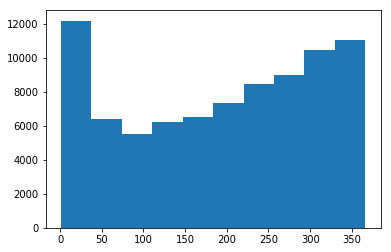

In [52]:
plt.hist(train.Date)